In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
data = pd.read_csv('complete data1.csv')

In [67]:
data.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Domlur,12.972442,77.580643,866377,Bangalore,18944.099790
1,Central,Indiranagar,12.960992,77.638726,743186,Bangalore,56837.022200
2,Central,Jeevanbheemanagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,Central,Malleswaram,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Pete area,13.003100,77.564300,893629,Bangalore,53270.063890


In [68]:
data.columns
data.dtypes

Borough           object
Neighborhoods     object
Latitude         float64
Longitude        float64
Population         int64
City              object
AverageIncome    float64
dtype: object

In [69]:
data.shape

(64, 7)

In [70]:
print(data.Borough.unique())
print(data.City.unique())

['Central' 'Eastern' 'NorthEastern' 'Northern' 'SouthEastern' 'Southern'
 'SouthernSuburbs' 'Western']
['Bangalore']


# Clustering

<Axes: xlabel='Latitude', ylabel='Longitude'>

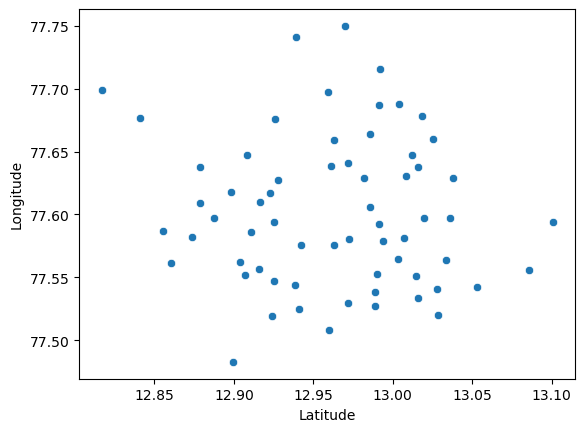

In [71]:
sns.scatterplot(x = 'Latitude', y = 'Longitude', data = data)

In [72]:
x = data [['Latitude','Longitude']]
x.head(2)

,Latitude,Longitude
0,12.972442,77.580643
1,12.960992,77.638726


In [73]:
from sklearn.cluster import KMeans

In [74]:
cluster = KMeans(n_clusters=3)
cluster.fit(x)

C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [75]:
p = cluster.predict(x)
p,len(p)

(array([2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2]),
 64)

In [76]:
wcss = []
for i in range (1,11):
    km = KMeans (n_clusters= i,max_iter=200)
    km.fit(x)
    wcss.append(km.inertia_)                             #### calculates the squared error
    

C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

In [77]:
wcss

[0.4490334774002419,
 0.28352958634837244,
 0.1665624429035492,
 0.12200944232316069,
 0.10260404861121863,
 0.08171367198183412,
 0.06851660045734109,
 0.0589428331591918,
 0.051688083389557105,
 0.04523240164208784]

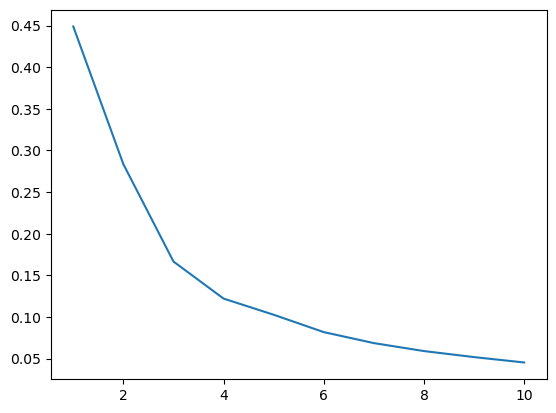

In [78]:
plt.plot(range(1,11),wcss)
plt.show()

In [79]:
cluster = KMeans(n_clusters=5)
cluster.fit(x)
p1 = cluster.predict(x)
p1,len(p1)

C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
        4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 2, 1, 2, 2, 2]),
 64)

In [80]:
data

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Domlur,12.972442,77.580643,866377,Bangalore,18944.099790
1,Central,Indiranagar,12.960992,77.638726,743186,Bangalore,56837.022200
2,Central,Jeevanbheemanagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,Central,Malleswaram,12.962900,77.659500,527874,Bangalore,6667.447632
4,Central,Pete area,13.003100,77.564300,893629,Bangalore,53270.063890
...,...,...,...,...,...,...,...
59,Western,Nandini Layout,12.959900,77.508300,623843,Bangalore,38627.411760
60,Western,Nayandahalli,13.016000,77.533800,638555,Bangalore,32490.969170
61,Western,Rajarajeshwari Nagar,12.941100,77.524800,474920,Bangalore,46826.803890
62,Western,Vijayanagar,12.924200,77.519100,516920,Bangalore,12533.785280


In [81]:
data['cluster']= p1
print(data.head())

   Borough      Neighborhoods   Latitude  Longitude  Population       City  \
0  Central             Domlur  12.972442  77.580643      866377  Bangalore   
1  Central        Indiranagar  12.960992  77.638726      743186  Bangalore   
2  Central  Jeevanbheemanagar  12.971891  77.641151      474289  Bangalore   
3  Central        Malleswaram  12.962900  77.659500      527874  Bangalore   
4  Central          Pete area  13.003100  77.564300      893629  Bangalore   

   AverageIncome  cluster  
0   18944.099790        1  
1   56837.022200        0  
2   41991.817440        0  
3    6667.447632        0  
4   53270.063890        1  


<Axes: xlabel='Latitude', ylabel='Longitude'>

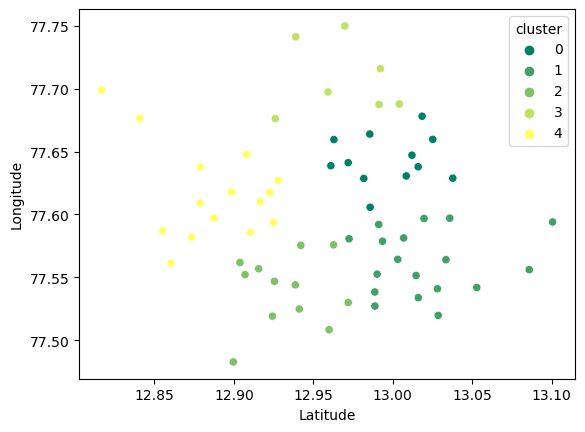

In [82]:
sns.scatterplot(x= 'Latitude', y = 'Longitude',hue= 'cluster',data = data, palette = 'summer')

In [83]:
data[data['cluster']==1]

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome,cluster
0,Central,Domlur,12.972442,77.580643,866377,Bangalore,18944.099790,1
4,Central,Pete area,13.003100,77.564300,893629,Bangalore,53270.063890,1
6,Central,Sadashivanagar,12.990100,77.552500,981362,Bangalore,60967.535870,1
7,Central,Seshadripuram,13.006800,77.581300,662625,Bangalore,59943.541560,1
8,Central,Shivajinagar,12.993500,77.578700,396862,Bangalore,58407.090340,1
11,Central,Bellandur,12.991100,77.592000,942711,Bangalore,26168.448090,1
26,Northern,Jalahalli,13.035800,77.597000,926976,Bangalore,39022.694140,1
27,Northern,Mathikere,13.052800,77.541900,569724,Bangalore,9836.954154,1
28,Northern,Peenya,13.033400,77.564000,757626,Bangalore,61046.854720,1
29,Northern,R. T. Nagar,13.028500,77.519700,661647,Bangalore,24706.335040,1


In [84]:
print(data['cluster'].value_counts(normalize=True)*100)

1    28.1250
4    23.4375
0    18.7500
2    18.7500
3    10.9375
Name: cluster, dtype: float64


# The Silhouette Score - Measure how similar a point is to its own cluster compared to other cluster.
The range of silhouette value is between +1 and -1. A high value is desireable and indicates that the point is placed in the correct cluster.

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
labels = cluster.labels_
silhouette_score(x, labels,metric='euclidean')

0.34597654556786556

In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [88]:
sc = StandardScaler()
x_scaled =sc.fit_transform(x)
x_scaled

array([[ 0.17090975, -0.35569584],
       [-0.02280381,  0.62297735],
       [ 0.16158805,  0.66384456],
       [ 0.00948038,  0.97301933],
       [ 0.68957477, -0.63107015],
       [ 0.00609682, -0.43729883],
       [ 0.46964374, -0.82989636],
       [ 0.75217052, -0.3446256 ],
       [ 0.52716416, -0.38843476],
       [ 0.39520555,  0.06650658],
       [ 0.32753447,  0.45236424],
       [ 0.48656151, -0.16433403],
       [-0.61478537,  1.25440898],
       [ 0.391822  ,  1.04715792],
       [ 0.50517106,  1.92334125],
       [ 0.70480076,  1.44986526],
       [ 0.48994507,  1.44312538],
       [-0.05311538,  1.61162218],
       [-0.39654613,  2.34963814],
       [ 0.12621299,  2.49623035],
       [ 0.84014293,  0.76408331],
       [ 1.27492964,  0.45573417],
       [ 1.06176573,  0.97638927],
       [ 0.90612223,  0.60906626],
       [ 0.77923895,  0.4860636 ],
       [ 0.94841666,  1.28642337],
       [ 1.24278587, -0.08008563],
       [ 1.53038798, -1.00850296],
       [ 1.20218322,

In [89]:
cluster = KMeans(n_clusters=5)
cluster.fit(x_scaled)
p1 = cluster.predict(x_scaled)
p1,len(p1)

C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Aishwarya21\.conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 3, 3, 0, 0, 0,
        3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 0]),
 64)

In [90]:
labels = cluster.labels_
silhouette_score(x_scaled, labels, metric='euclidean')

0.3897581028770817

In [91]:
sc.inverse_transform(x_scaled)

array([[12.972442 , 77.580643 ],
       [12.9609917, 77.6387256],
       [12.971891 , 77.641151 ],
       [12.9629   , 77.6595   ],
       [13.0031   , 77.5643   ],
       [12.9627   , 77.5758   ],
       [12.9901   , 77.5525   ],
       [13.0068   , 77.5813   ],
       [12.9935   , 77.5787   ],
       [12.9857   , 77.6057   ],
       [12.9817   , 77.6286   ],
       [12.9911   , 77.592    ],
       [12.926    , 77.6762   ],
       [12.9855   , 77.6639   ],
       [12.9922   , 77.7159   ],
       [13.004    , 77.6878   ],
       [12.9913   , 77.6874   ],
       [12.9592   , 77.6974   ],
       [12.9389   , 77.7412   ],
       [12.9698   , 77.7499   ],
       [13.012    , 77.6471   ],
       [13.0377   , 77.6288   ],
       [13.0251   , 77.6597   ],
       [13.0159   , 77.6379   ],
       [13.0084   , 77.6306   ],
       [13.0184   , 77.6781   ],
       [13.0358   , 77.597    ],
       [13.0528   , 77.5419   ],
       [13.0334   , 77.564    ],
       [13.0285   , 77.5197   ],
       [13

# Linear Regression

In [92]:
data.City.value_counts()

Bangalore    64
Name: City, dtype: int64

In [93]:
#### Filter the Data based on State -
Bangalore = data[data['City']=='Bangalore']
Bangalore.head(2)

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome,cluster
0,Central,Domlur,12.972442,77.580643,866377,Bangalore,18944.09979,1
1,Central,Indiranagar,12.960992,77.638726,743186,Bangalore,56837.02220,0


In [94]:
Bangalore.Population.var()

79297145483.79724

C:\Users\Aishwarya21\AppData\Local\Temp\ipykernel_3368\1239534268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Bangalore.corr(),annot = True,cmap = 'RdBu')


<Axes: >

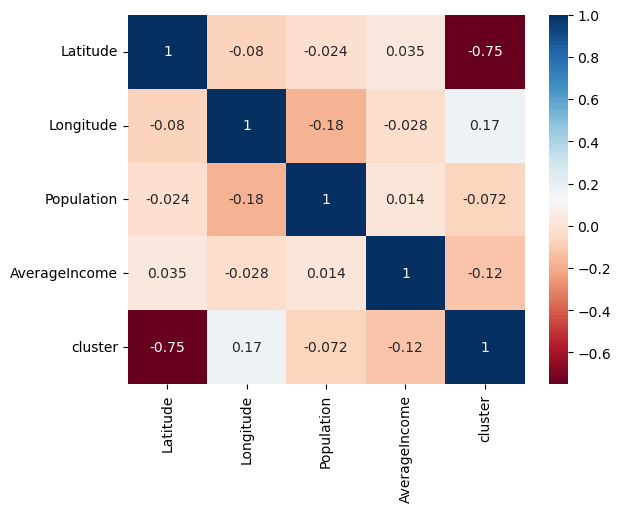

In [95]:
#### Transformation are used to scale down the data in the normal distributed
sns.heatmap(Bangalore.corr(),annot = True,cmap = 'RdBu')

In [96]:
Bangalore[['Latitude','Longitude','Population','AverageIncome']]

,Latitude,Longitude,Population,AverageIncome
0,12.972442,77.580643,866377,18944.099790
1,12.960992,77.638726,743186,56837.022200
2,12.971891,77.641151,474289,41991.817440
3,12.962900,77.659500,527874,6667.447632
4,13.003100,77.564300,893629,53270.063890
...,...,...,...,...
59,12.959900,77.508300,623843,38627.411760
60,13.016000,77.533800,638555,32490.969170
61,12.941100,77.524800,474920,46826.803890
62,12.924200,77.519100,516920,12533.785280


In [97]:
X = Bangalore[['Latitude','Longitude','Population']]
Y = Bangalore['AverageIncome']

In [98]:
model = LinearRegression()
model_train = model.fit(X,Y)
print("model Training Completed")

model Training Completed


In [99]:
model_train.coef_

array([ 1.00813595e+04, -6.94196200e+03,  7.11769059e-04])

In [100]:
model_train.intercept_

445531.70103154756

In [101]:
pred = model_train.predict
pred(X)

array([38366.33726083, 37760.01192625, 37661.66208838, 37481.78266959,
       38808.26119534, 38205.38670694, 38821.56430842, 38563.12737175,
       38257.93251125, 37764.79209745, 37977.53172048, 38529.92758314,
       36766.24022936, 37390.69640921, 37245.09036872, 37574.44179533,
       37843.24344242, 36983.01693716, 36685.70566177, 36607.16377843,
       38136.99347913, 38658.40826761, 38215.06364259, 38310.35512544,
       37924.19204836, 37870.03235853, 38934.65485615, 39234.25915351,
       39019.00624908, 39208.82162149, 38284.60183347, 39564.34451977,
       38959.23055811, 38823.18027852, 37269.28817157, 35874.84179274,
       37577.08027638, 36313.19979297, 37016.71945253, 37183.1831123 ,
       37633.80908005, 38088.19718932, 37784.04136244, 38220.57383405,
       37271.9062063 , 37254.03582608, 37888.58564191, 37741.72382044,
       37802.16218001, 37424.20448055, 36878.56148321, 36832.97288809,
       36795.67416137, 37285.4093464 , 36788.22088905, 38654.15370107,
      

# Decision_tree and Random forest

In [111]:
x = data[['Latitude','Longitude','Population','AverageIncome']]
y = data['Neighborhoods']

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn import tree

In [114]:
model = DecisionTreeClassifier()
clf =model.fit(x_train,y_train)

[Text(0.043478260869565216, 0.9886363636363636, 'x[2] <= 39977.0\ngini = 0.977\nsamples = 44\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1]'),
 Text(0.021739130434782608, 0.9659090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.06521739130434782, 0.9659090909090909, 'x[3] <= 7509.191\ngini = 0.977\nsamples = 43\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1]'),
 Text(0.043478260869565216, 0.9431818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.08695652173913043, 0.9431818181818182, 'x[1] <= 77.522\ngini = 0.976\nsamples = 

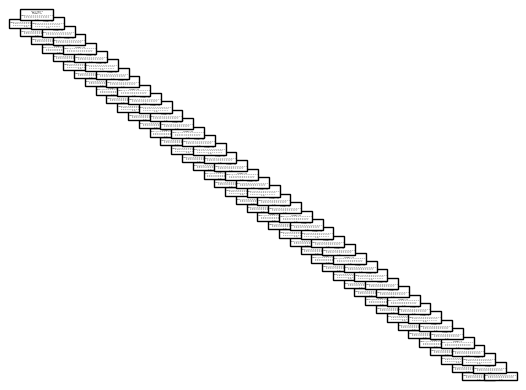

In [115]:
tree.plot_tree(clf)

In [116]:
pred1= clf.predict(x_test)
pred1

array(['Mahalakshmi Layout', 'Malleswaram', 'Mathikere', 'Gottigere',
       'R. T. Nagar', 'Anjanapura', 'Mathikere', 'Banaswadi', 'Hebbal',
       'Domlur', 'R. T. Nagar', 'Mathikere', 'J. P. Nagar', 'Peenya',
       'Vijayanagar', 'Gottigere', 'Peenya', 'Gottigere', 'Uttarahalli',
       'Varthur'], dtype=object)

In [117]:
result =confusion_matrix(y_test,pred1)
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
model2 = RandomForestClassifier(criterion='gini')
clf2 = model2.fit(x_train,y_train)

In [120]:
pred2 = clf2.predict(x_test)
pred2

array(['Mathikere', 'Malleswaram', 'Kumaraswamy Layout', 'Kothnur',
       'R. T. Nagar', 'Jeevanbheemanagar', 'Kothnur', 'Hoodi',
       'Jeevanbheemanagar', 'Domlur', 'Rajarajeshwari Nagar',
       'Lingarajapuram', 'J. P. Nagar', 'Kengeri', 'Kamakshipalya',
       'HSR Layout', 'Mathikere', 'HSR Layout', 'Uttarahalli',
       'Banaswadi'], dtype=object)

In [121]:
result2 = confusion_matrix(y_test,pred2)
result2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

ValueError: The number of FixedLocator locations (36), usually from a call to set_ticks, does not match the number of labels (44).

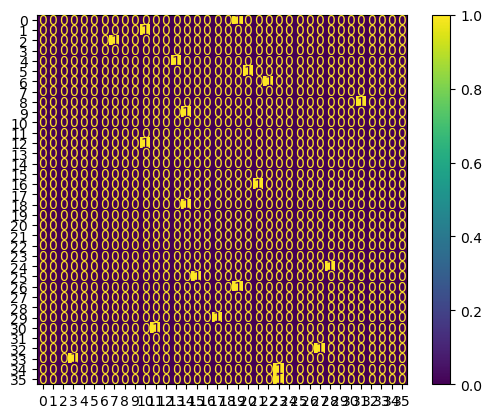

In [122]:
ConfusionMatrixDisplay(result2,display_labels = clf2.classes_).plot()
plt.show

In [123]:
clf2.feature_importances_

array([0.22972613, 0.26927874, 0.24041043, 0.2605847 ])

<Axes: >

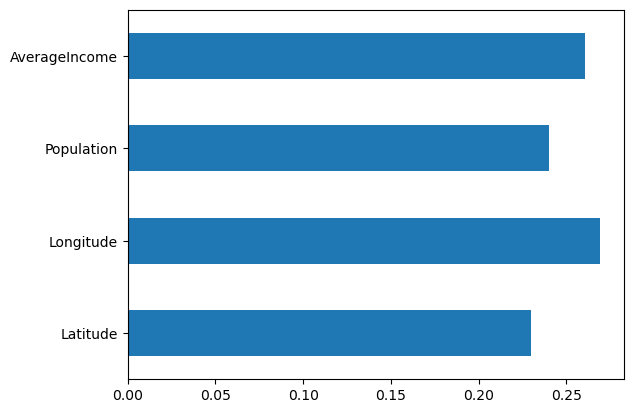

In [124]:
feat_impt = pd.Series(clf2.feature_importances_, index = x.columns)
feat_impt.plot(kind = 'barh')

In [125]:
x.corr()

,Latitude,Longitude,Population,AverageIncome
Latitude,1.000000,-0.079944,-0.024384,0.034664
Longitude,-0.079944,1.000000,-0.178439,-0.027505
Population,-0.024384,-0.178439,1.000000,0.014324
AverageIncome,0.034664,-0.027505,0.014324,1.000000


# Exploratory Data Analysis

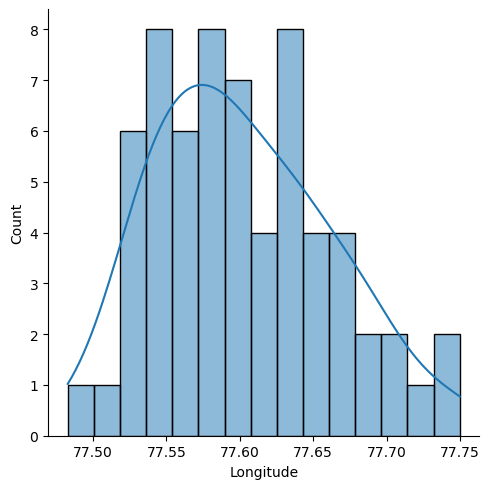

In [127]:
sns.displot(x='Longitude',data=data,kde=True,bins=15)

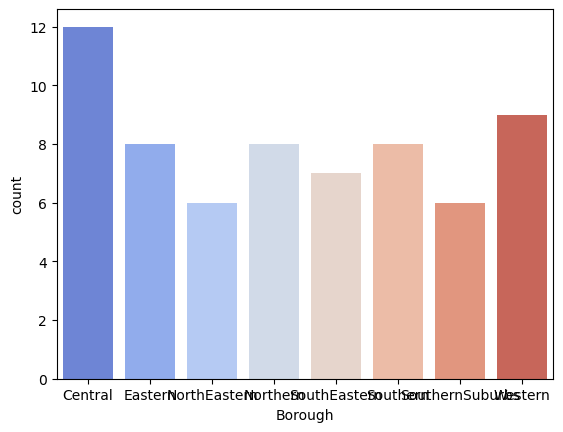

In [128]:
sns.countplot(x='Borough',data=data,palette='coolwarm');

<Axes: xlabel='Population', ylabel='Density'>

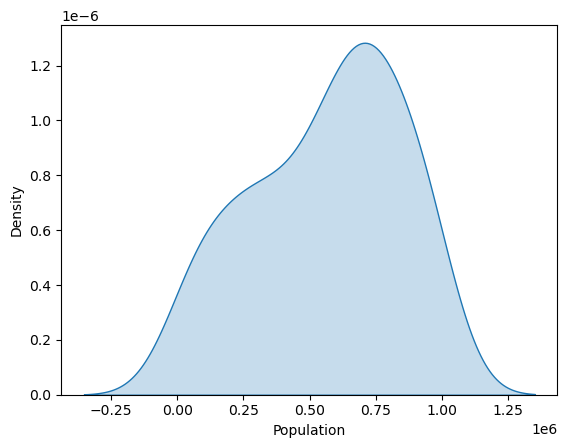

In [129]:
sns.kdeplot(data.Population, fill=True)

# Thank you for reviewing !